In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [2]:
faces = fetch_lfw_people()

In [3]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [4]:
faces.data.shape

(13233, 2914)

In [5]:
faces.target.shape

(13233,)

In [6]:
faces.target_names.shape

(5749,)

In [7]:
faces.images.shape

(13233, 62, 47)

In [8]:
def plot_faces(data):
    fix, axes = plt.subplots(6, 6, figsize = (15, 15), subplot_kw = {'xticks':[], 'yticks':[]}, 
        gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(62, 47), cmap = 'bone')

In [9]:
x = faces.data
y = faces.target

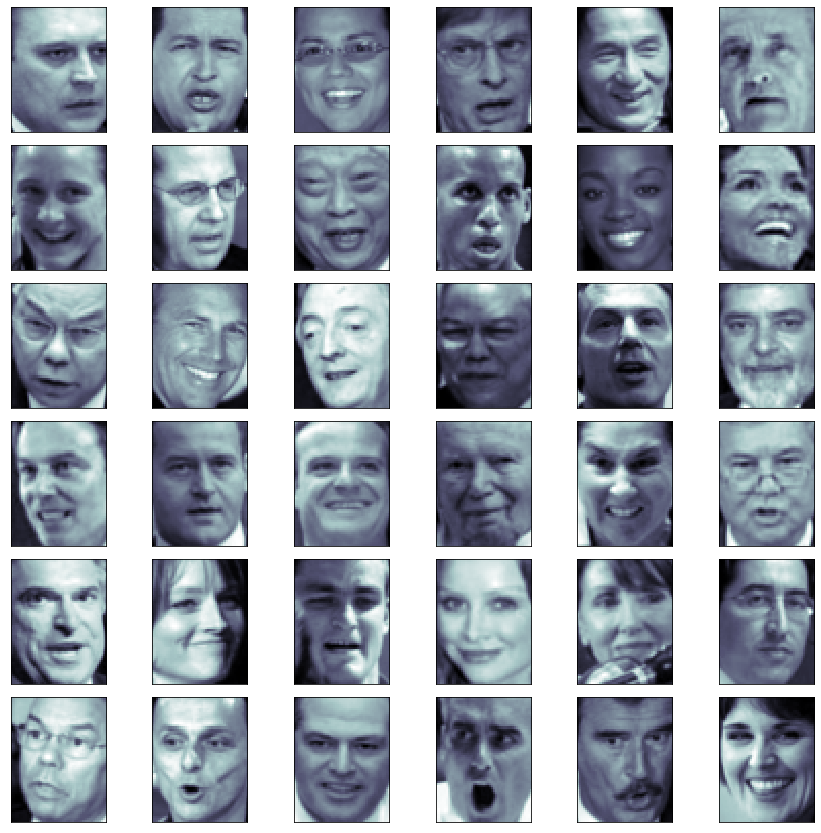

In [10]:
rand_idx = np.random.permutation(x.shape[0])
example_datas = x[rand_idx][:36, :]
plot_faces(example_datas)

### lfw_people数据 不平衡， 有人照片多， 有人照片少

In [11]:
face2 = fetch_lfw_people(min_faces_per_person=50)  # 取出最少50张以上照片的人脸 

In [12]:
face2.images.shape

(1560, 62, 47)

In [13]:
face2.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [14]:
face2.target

array([11,  4,  2, ...,  3, 11,  5], dtype=int64)

In [15]:
len(face2.target_names)

12

### 数据预处理

In [16]:
x = face2.data
y = face2.target

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 1, test_size = 0.2)

In [19]:
train_x.shape

(1248, 2914)

In [20]:
test_x.shape

(312, 2914)

### KNN分类

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn_clf = KNeighborsClassifier()

In [23]:
knn_clf.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
knn_clf.score(test_x, test_y)

0.5384615384615384

### SVM

In [25]:
from sklearn.svm import SVC

In [26]:
svc = SVC()
svc.fit(train_x, train_y)
svc.score(test_x, test_y)

0.7339743589743589

### CNN

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Activation
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [28]:
train_x = train_x.reshape(train_x.shape[0], 62, 47, 1)/255  ## 标准化
test_x = test_x.reshape(test_x.shape[0], 62, 47, 1)/255

train_y = keras.utils.to_categorical(train_y, num_classes=12)  ## 多分类 使用one-hot编码
test_y = keras.utils.to_categorical(test_y, num_classes=12)

In [29]:
train_x.shape

(1248, 62, 47, 1)

In [30]:
test_x.shape

(312, 62, 47, 1)

In [31]:
test_y.shape

(312, 12)

In [32]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (62, 47, 1)))
model.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dense(60))
model.add(Activation('relu'))
model.add(Dense(12))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 47, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 45632)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               6844950   
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)              

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs = 20, batch_size=50, verbose=1, validation_data=(test_x, test_y), workers=-1)


Train on 1248 samples, validate on 312 samples
Epoch 1/20
1248/1248 [==============================] - 13s 10ms/step - loss: 2.1916 - accuracy: 0.3077 - val_loss: 1.9984 - val_accuracy: 0.3782
Epoch 2/20
1248/1248 [==============================] - 14s 12ms/step - loss: 1.9782 - accuracy: 0.3670 - val_loss: 1.6546 - val_accuracy: 0.4808
Epoch 3/20
1248/1248 [==============================] - 14s 11ms/step - loss: 1.4087 - accuracy: 0.5537 - val_loss: 1.1947 - val_accuracy: 0.6571
Epoch 4/20
1248/1248 [==============================] - 13s 10ms/step - loss: 0.8763 - accuracy: 0.7404 - val_loss: 0.9355 - val_accuracy: 0.7532
Epoch 5/20
1248/1248 [==============================] - 12s 10ms/step - loss: 0.5475 - accuracy: 0.8317 - val_loss: 0.8681 - val_accuracy: 0.7340
Epoch 6/20
1248/1248 [==============================] - 12s 9ms/step - loss: 0.3649 - accuracy: 0.8910 - val_loss: 0.6175 - val_accuracy: 0.8013
Epoch 7/20
1248/1248 [==============================] - 13s 11ms/step - loss:

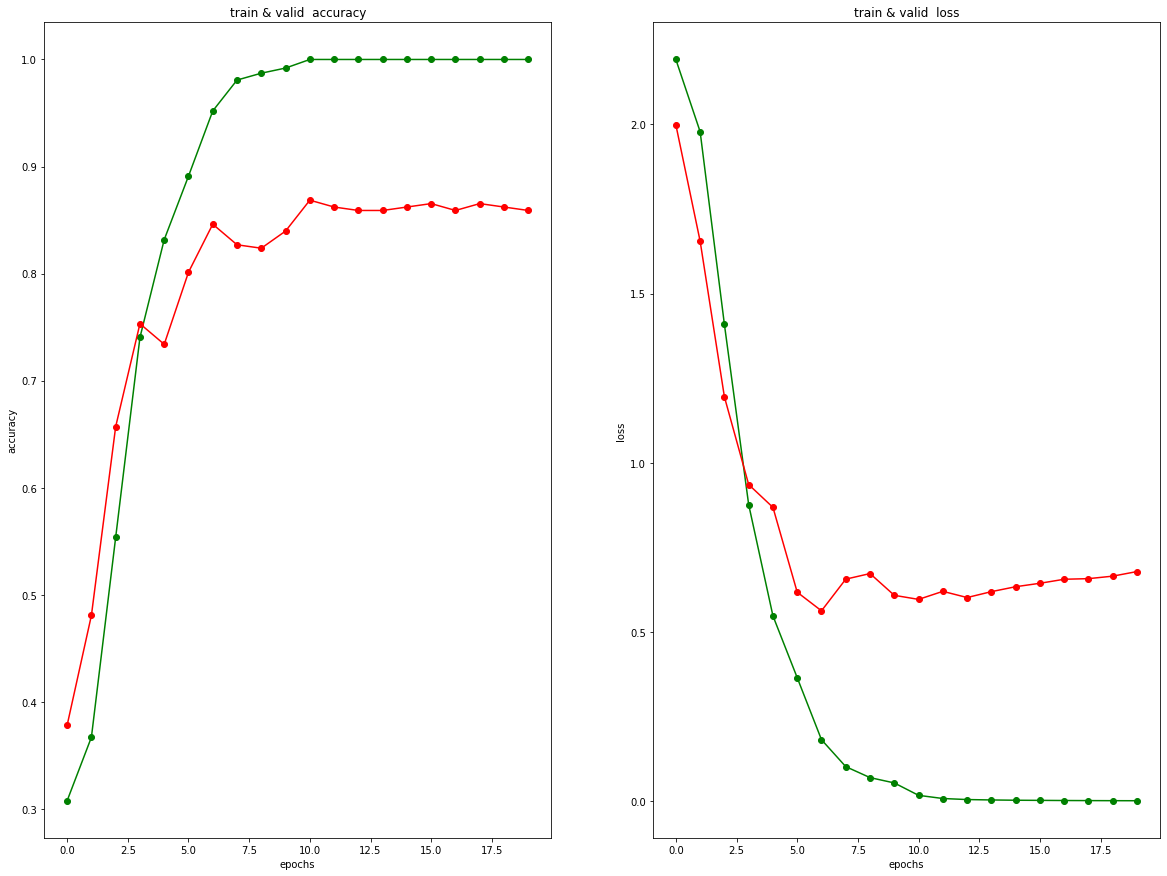

In [34]:
epochs = [i for i in range(20)]
fig, ax = plt.subplots(1, 2)
train_accuracy = history.history['accuracy']
valid_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

fig.set_size_inches(20, 15)

ax[0].plot(epochs, train_accuracy, 'go-', label = 'train accuracy')
ax[0].plot(epochs, valid_accuracy, 'ro-', label = 'valid accuracy')
ax[0].set_title('train & valid  accuracy')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')

ax[1].plot(epochs, train_loss, 'go-', label = 'train loss')
ax[1].plot(epochs, valid_loss, 'ro-', label = 'valid loss')
ax[1].set_title('train & valid  loss')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')
plt.show()

In [35]:
scores = model.evaluate(test_x, test_y) 
scores

312/312 [==============================] - 1s 3ms/step


[0.6785048017135034, 0.8589743375778198]

In [36]:
faces.target_names[faces.target[9077]]

'Colin Powell'

In [37]:
temp = faces.data[9077].reshape(1, 62, 47, 1)/255 

In [38]:
id = model.predict_classes(temp)
id

array([1], dtype=int64)

In [39]:
rand_idx[24]

11190

In [40]:
faces.target_names[faces.target[7055]]

'Tony Blair'

In [41]:
temp = faces.data[7055].reshape(1, 62, 47, 1)/255 

In [42]:
id = model.predict_classes(temp)
id

array([11], dtype=int64)

### 有过拟合现象 增加dropout层

In [43]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (62, 47, 1)))
model.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(60))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(12))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 47, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 23, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 45632)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               6844950   
_________________________________________________________________
activation_4 (Activation)    (None, 150)              

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs = 20, batch_size=50, verbose=1, validation_data=(test_x, test_y), workers=-1)

Train on 1248 samples, validate on 312 samples
Epoch 1/20
1248/1248 [==============================] - 14s 11ms/step - loss: 2.3405 - accuracy: 0.2949 - val_loss: 2.0535 - val_accuracy: 0.3782
Epoch 2/20
1248/1248 [==============================] - 13s 11ms/step - loss: 2.1756 - accuracy: 0.3261 - val_loss: 2.0120 - val_accuracy: 0.3782
Epoch 3/20
1248/1248 [==============================] - 14s 11ms/step - loss: 2.0327 - accuracy: 0.3526 - val_loss: 1.7991 - val_accuracy: 0.4744
Epoch 4/20
1248/1248 [==============================] - 13s 11ms/step - loss: 1.7428 - accuracy: 0.4367 - val_loss: 1.4055 - val_accuracy: 0.5545
Epoch 5/20
1248/1248 [==============================] - 13s 10ms/step - loss: 1.3600 - accuracy: 0.5633 - val_loss: 1.0675 - val_accuracy: 0.6538
Epoch 6/20
1248/1248 [==============================] - 13s 11ms/step - loss: 1.0844 - accuracy: 0.6506 - val_loss: 0.8720 - val_accuracy: 0.7019
Epoch 7/20
1248/1248 [==============================] - 14s 11ms/step - loss:

In [45]:
scores = model.evaluate(test_x, test_y) 
scores

312/312 [==============================] - 1s 3ms/step


[0.5701473844357026, 0.8621794581413269]

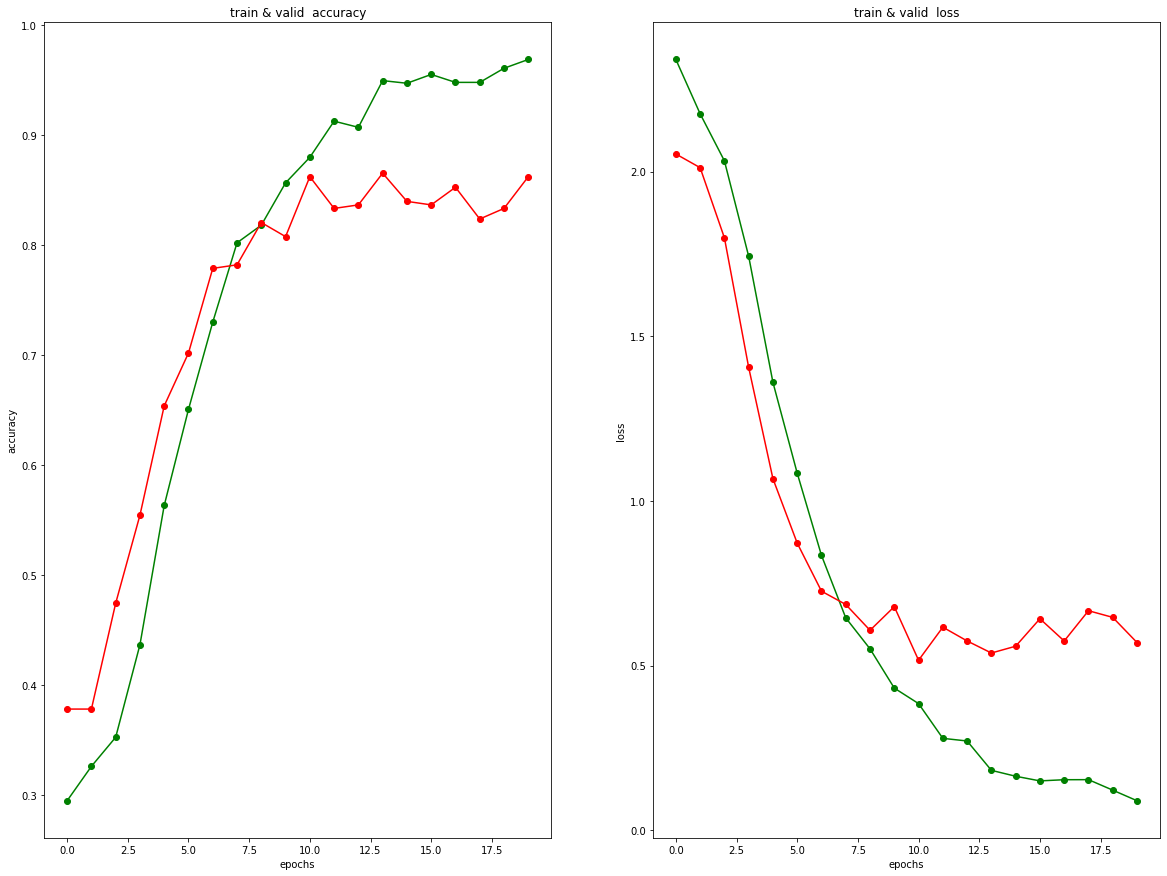

In [46]:
epochs = [i for i in range(20)]
fig, ax = plt.subplots(1, 2)
train_accuracy = history.history['accuracy']
valid_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

fig.set_size_inches(20, 15)

ax[0].plot(epochs, train_accuracy, 'go-', label = 'train accuracy')
ax[0].plot(epochs, valid_accuracy, 'ro-', label = 'valid accuracy')
ax[0].set_title('train & valid  accuracy')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')

ax[1].plot(epochs, train_loss, 'go-', label = 'train loss')
ax[1].plot(epochs, valid_loss, 'ro-', label = 'valid loss')
ax[1].set_title('train & valid  loss')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')
plt.show()